<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH2/FasterRCNN_Tensorflow_objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tensorflow,keras downgrade

In [ ]:
!pip install tensorflow==1.13.1
!pip install keras==2.2.1

import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

## Git Clone

In [2]:
! git clone http://github.com/chulminkw/DLCV

Cloning into 'DLCV'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 8.88 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [3]:
path = '/content/DLCV/data/'
img_path = path+'image/beatles01.jpg'

##Library Import

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import time
import os


##Confirm Image

(633, 806, 3)


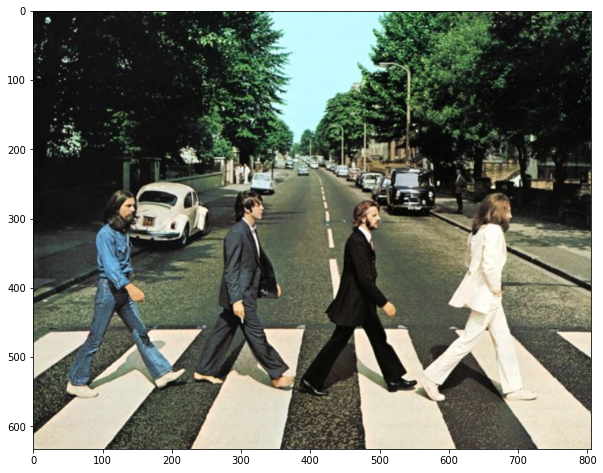

In [5]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

print(img.shape)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

## Label Mapping
- COCO dataset에 대해 Tensorflow로 Image Detection 진행시 아래와 같은 label mapping 사용(FasterRCNN사용)

In [6]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

## Change Home Directory

In [7]:
os.mkdir('/content/DLCV/fasterRCNN')
os.chdir('/content/DLCV/fasterRCNN')
os.getcwd()

'/content/DLCV/fasterRCNN'

## Pretrained_Model download(fasterRCNN-backbone:ResNet50)

In [ ]:
!echo "##### downloading pretrained weight file and config pbtxt file"
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

In [ ]:
!echo "##### uncompressing tar file"
!tar -xvf faster_rcnn*.gz

In [10]:
!mv /content/DLCV/fasterRCNN/faster_rcnn*.pbtxt /content/DLCV/fasterRCNN/faster_rcnn_resnet50_coco_2018_01_28/graph.pbtxt #move file

In [11]:
!rm *.gz #tgr file remove

In [12]:
sorted(os.listdir('/content/DLCV/fasterRCNN/faster_rcnn_resnet50_coco_2018_01_28')) #directiory search

['checkpoint',
 'frozen_inference_graph.pb',
 'graph.pbtxt',
 'model.ckpt.data-00000-of-00001',
 'model.ckpt.index',
 'model.ckpt.meta',
 'pipeline.config',
 'saved_model']

## Image preprocessing and objectDetection Visualization

type of out: <class 'list'>, len of out: 4
[array([19.], dtype=float32), array([[0.99974984, 0.99930644, 0.9980475 , 0.9970795 , 0.9222008 ,
        0.8515703 , 0.8055376 , 0.7321974 , 0.7169089 , 0.6350252 ,
        0.6057731 , 0.5482028 , 0.51252437, 0.46408176, 0.43892667,
        0.41287616, 0.4075464 , 0.39610404, 0.3171757 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ,

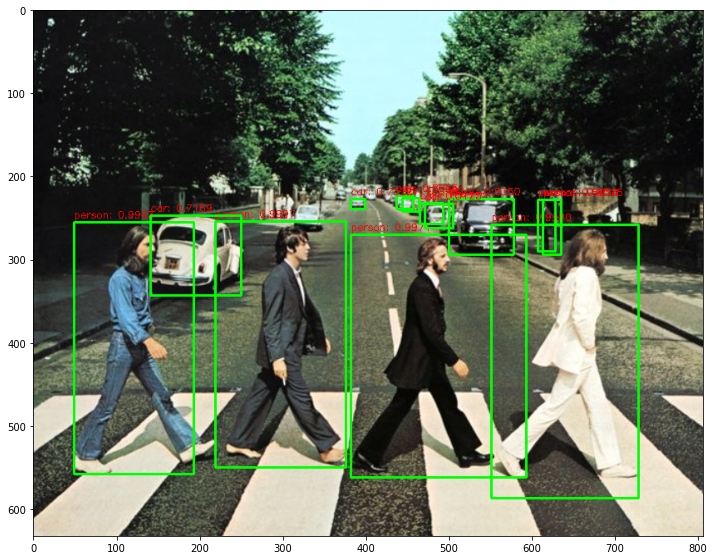

In [18]:
with tf. gfile.FastGFile('/content/DLCV/fasterRCNN/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb','rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    img = cv2.imread(img_path)
    draw_img = img.copy()

    row = img.shape[0]
    col = img.shape[1]
    inp = img[:,:,[2,1,0]]
    start=time.time()

    ## image에대한 object Detection 실행
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                    feed_dict={'image_tensor:0':inp.reshape(1,inp.shape[0],inp.shape[1],3)})
    
    print("type of out: {}, len of out: {}".format(type(out), len(out)))

    print(out)
    green=(0,255,0)
    red=(0,0,255)

    num_detections =int(out[0][0])
    for i in range(num_detections):
        classid = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.5:
            left = int(bbox[1] * col)
            top = int(bbox[0] * row)
            right = int(bbox[3] * col)
            bottom = int(bbox[2] * row)

            caption = "{}: {:.4f}".format(labels_to_names[classid], score)
            print(caption)

            cv2.rectangle(draw_img, (left,top), (right,bottom), color= green, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

    print("time: {}".format(time.time()-start))

img_rgb=cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()


 

## Functional

In [26]:
def get_tensor_detected_image(sess, img, used_copied_array):

    row = img.shape[0]
    col = img.shape[1]

    if used_copied_array:
        draw_img = img.copy()
    else:
        draw_img = img 

    inp = img[:,:,[2,1,0]]

    start=time.time()

    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                    feed_dict={'image_tensor:0':inp.reshape(1,inp.shape[0],inp.shape[1],3)})
    
    green=(0,255,0)
    red=(0,0,255)

    num_detections =int(out[0][0])
    for i in range(num_detections):
        classid = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.5:
            left = int(bbox[1] * col)
            top = int(bbox[0] * row)
            right = int(bbox[3] * col)
            bottom = int(bbox[2] * row)

            caption = "{}: {:.4f}".format(labels_to_names[classid], score)
            print(caption)

            cv2.rectangle(draw_img, (left,top), (right,bottom), color= green, thickness=2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

    print("time: {}".format(time.time()-start))

    return draw_img


person: 0.9997
person: 0.9993
person: 0.9980
person: 0.9971
car: 0.9222
person: 0.8516
car: 0.8055
car: 0.7322
car: 0.7169
truck: 0.6350
person: 0.6058
car: 0.5482
car: 0.5125
time: 18.9239342212677


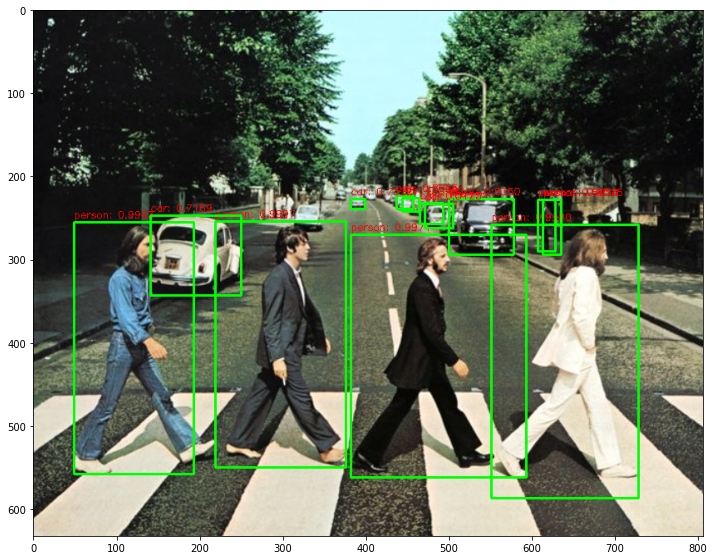

In [29]:
with tf. gfile.FastGFile('/content/DLCV/fasterRCNN/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb','rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())

with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    img = cv2.imread(img_path)
    draw_img = get_tensor_detected_image(sess, img, True)


rgb_img = cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(rgb_img)
plt.show() 

##Video preprocessing & object Detection 

In [19]:
os.listdir(path+'video')

['balloon_dog02.mp4',
 'jack_and_raccoon.mp4',
 'Pet_fight01.mp4',
 'InfiniteWar01.mp4',
 'Night_Day_Chase.mp4',
 'FishnShark01.mp4',
 'John_Wick_small.mp4',
 'balloon_dog01.mp4',
 'NFL01.mp4',
 'London_Street.mp4']

In [24]:
video_path = path+'video/John_Wick_small.mp4'
video_output_path = path+'video/John_wick_new.avi'

cap = cv2.VideoCapture(video_path)
codec = cv2.VideoWriter_fourcc(*'XVID')

vd_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vd_FPS = int(cap.get(cv2.CAP_PROP_FPS))
frame_cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)

print("video_size_per_frame: {}, video_FPS: {:.4f}, frame_CNT: {}".format(vd_size, vd_FPS, frame_cnt))

video_size_per_frame: (1072, 460), video_FPS: 30.0000, frame_CNT: 58.0


In [ ]:
vid_writer = cv2.VideoWriter(video_output_path, codec, vd_FPS, vd_size)

green=(0,255,0)
red=(0,0,255)

with tf. gfile.FastGFile('/content/DLCV/fasterRCNN/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb','rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())


with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')

    while True:
        has_frame, img_frame = cap.read()
        if not has_frame:
            print("NO more frame to process")
            break

        draw_img_frame = get_tensor_detected_image(sess, img_frame, False)
        vid_writer.write(draw_img_frame)

vid_writer.release()
cap.release()


    